## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://storage.teklia.com/shared/deepnlp-labs/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://storage.teklia.com/shared/deepnlp-labs/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://storage.teklia.com/shared/deepnlp-labs/stop_word_fr.txt



In [10]:
import pandas as pd

df_text = pd.read_csv("LeMonde2003_9classes.csv.gz")
print(df_text.shape)
df_text


(30165, 2)


,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART
2,la perspective d'une enquête judiciaire sur la...,FRA
3,le tribunal administratif de limoges a annulé ...,SOC
4,des avions américains et britanniques ont bomb...,INT
...,...,...
30160,reçu à la mairie de biarritz à l'occasion d'un...,FRA
30161,la française malia metella a remporté le titre...,SPO
30162,1 pourquoi avoir choisi les années 1950 pour k...,ART
30163,la croix a licencié un journaliste alain herto...,ENT


<Axes: xlabel='count', ylabel='category'>

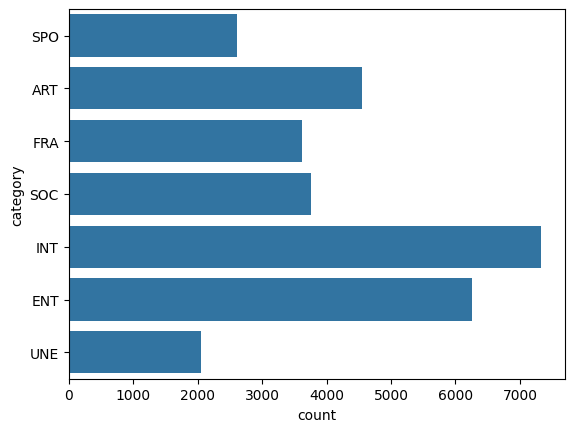

In [16]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
df_text["category"].value_counts()

sns.countplot(data=df_text, y="category")

In [14]:
# Print examples of the articles
#pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
df_text


,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART
2,la perspective d'une enquête judiciaire sur la...,FRA
3,le tribunal administratif de limoges a annulé ...,SOC
4,des avions américains et britanniques ont bomb...,INT
...,...,...
30160,reçu à la mairie de biarritz à l'occasion d'un...,FRA
30161,la française malia metella a remporté le titre...,SPO
30162,1 pourquoi avoir choisi les années 1950 pour k...,ART
30163,la croix a licencié un journaliste alain herto...,ENT


ENT


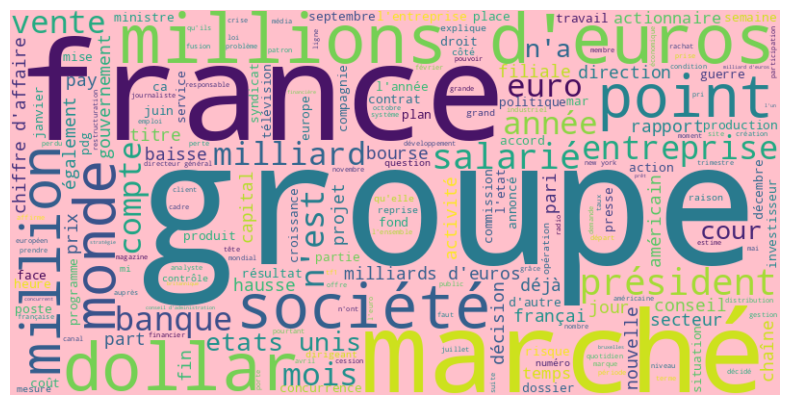

INT


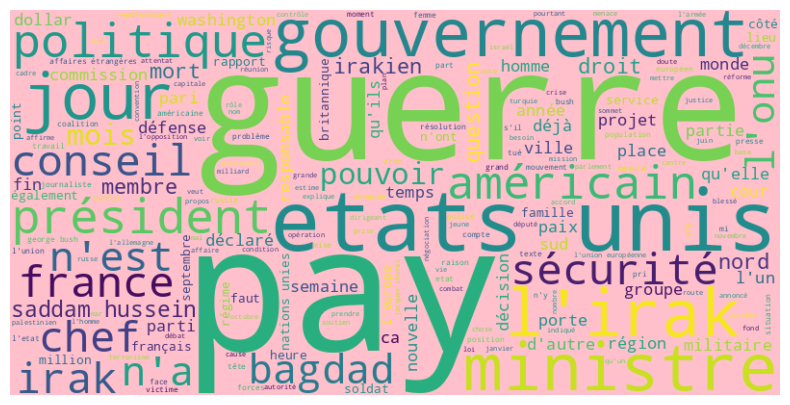

ART


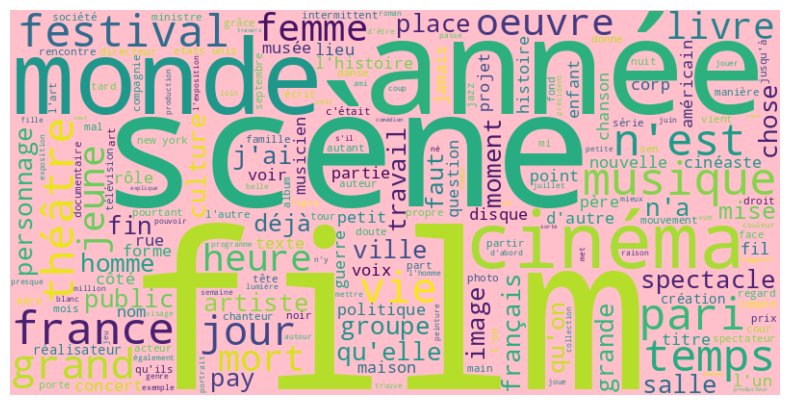

SOC


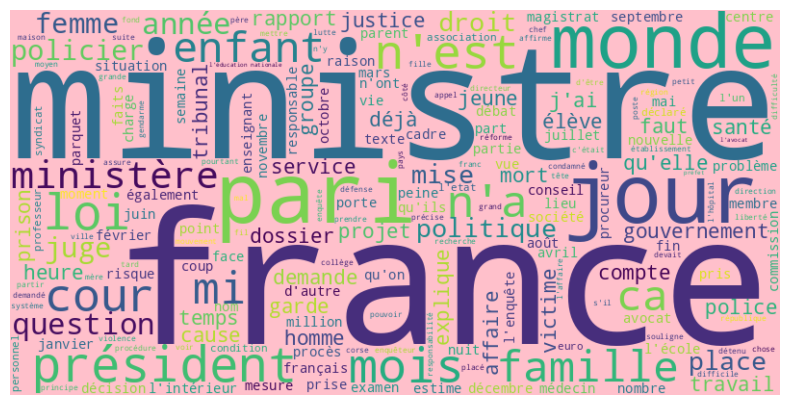

FRA


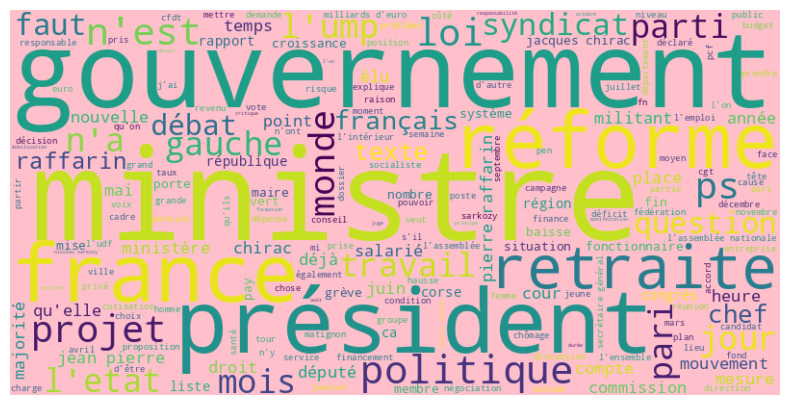

In [21]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    print(cat)
 # Créer le WordCloud
    text_cat = " ".join(df_text[df_text['category'] == cat]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text_cat)

    # Afficher
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  
    plt.show()
 

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [24]:
import CountVectorize

ModuleNotFoundError: No module named 'CountVectorize'

In [31]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size

# Split train/dev/test (60% train, 20% dev, 20% test)
df_train, df_dev_test =train_test_split(df_text.dropna(), test_size =0.2, random_state=42)

df_dev, df_test =train_test_split(df_dev_test.dropna(), test_size =0.5, random_state=42)

X_train = df_train.text
X_dev = df_dev.text
X_test = df_test.text
y_train = df_train.category
y_dev = df_dev.category
y_test = df_test.category




In [37]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
vectorizer = CountVectorizer(max_features=1000, stop_words=STOPWORDS)

vectorizer.fit(X_train)
# Fit sur le train et transformer tous les sets
X_train_vec = vectorizer.fit_transform(X_train)
X_dev_vec   = vectorizer.transform(X_dev)
X_test_vec  = vectorizer.transform(X_test)# create the vectorizer object

# fit on train data

# apply it on train and dev data


/opt/python/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(


In [36]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)
# create the MultinomialNB

# Train 

# Evaluate 
train_score = clf.score(X_train, X_train_vec)
dev_score   = clf.score(X_dev, X_dev_vec)
test_score  = clf.score(X_test, X_test_vec)

print(f"Train accuracy: {train_score:.4f}")
print(f"Dev accuracy:   {dev_score:.4f}")
print(f"Test accuracy:  {test_score:.4f}")


ValueError: could not convert string to float: "en ces temps troublés pour les actionnaires plus de 15 000 d'entre eux se sont rendus samedi 3 mai dans la petite ville d'omaha dans le nebraska pour s'entasser huit heures d'affilée dans une salle de spectacle et écouter la bonne parole de warren buffett surnommé le sage d'omaha le deuxième homme le plus riche du monde derrière bill gates incarne aux yeux de ses nombreux admirateurs la vertu la modestie et l'austérité attribuées au capitalisme d'antan les actionnaires de son fonds d'investissement baptisé berkshire hathaway lui vouent une reconnaissance et une admiration qui frisent le culte de la personnalité cet homme cache derrière d'épaisses lunettes de myope des cravates démodées et des costumes passe-partout un véritable art de l'investissement un épargnant lui ayant confié 10 000 dollars en 1970 se trouve aujourd'hui à la tête de 20 millions de dollars popularité sans précédent en dépit d'une fortune estimée à près de 40 milliards de dollars 35,68 milliards d'euros il conduit une lincoln plutôt âgée avale tous les midis au même endroit depuis un demi-siècle un hamburger en buvant un coca-cola à la cerise il ne touche jamais ni au café ni à l'alcool milliardaire aux goûts d'américain moyen warren buffett 72 ans vit dans la maison où il s'est installé en 1956 il venait alors de créer son premier fonds d'investissement buffett partnership quelques voisins lui ayant confié la gestion de leurs économies il s'octroie un salaire annuel de seulement 100 000 dollars et ne compte pas transmettre à ses trois enfants l'essentiel de sa fortune qui ira à une fondation caritative warren buffett n'a jamais mis les pieds à washington n'aime pas wall street et ne croyait pas à la nouvelle économie je ne comprenais rien aux métiers dont on me parlait cela lui a valu à la fin des années 1990 d'être traité de ringard et de connaître aujourd'hui une popularité sans précédent il dénonce depuis des années les stock-options l'irresponsabilité et la corruption des conseils d'administration et la rapacité des chefs d'entreprise un système où les rémunérations des dirigeants n'ont plus aucun rapport avec les performances de leurs sociétés et ne cessent depuis vingt ans de s'accroître par rapport à celles du salarié moyen est un système détestable a-t-il encore affirmé samedi il en a profité pour dénigrer les analystes nous ne regardons jamais leurs études si j'en ai lu une c'est qu'il y avait alors pénurie de journaux satiriques il s'en est pris aussi au gouvernement il condamne la suppression de la taxe sur les dividendes uniquement pour les riches et l'intention de placer en actions les fonds du système de retraite public il s'agit d'une très mauvaise idée de mettre cet argent à la merci des soubresauts de la bourse sous prétexte de soutenir le système a-t-il dit warren buffett déteste les apparitions publiques il fait une seule exception tous les ans lors de l'assemblée générale de son fonds c'est le seul homme sur la planète capable d'attirer en plein coeur du midwest autant de personnes pour autre chose qu'un match de football explique enthousiaste john bailey de boston face à cette ferveur le numéro bien rodé de warren buffett et de son partenaire de toujours charlie munger 79 ans est un mélange d'humour d'autodérision et de vérités premières pour certains il s'agit presque d'une forme de culte explique henry asher un gérant de portefeuille pour moi il s'agit de l'occasion unique de l'entendre répondre toujours avec autant de bon sens à des questions parfois très complexes si vous êtes intéressés par la vie des entreprises ou les placements financiers vous pouvez assister à une leçon dont vous ne trouverez pas l'équivalent dans les plus grandes universités ajoute matt sauer lui aussi gestionnaire dès 4 heures les plus courageux attendaient samedi devant les portes du omaha 's civic auditorium qui se sont ouvertes à 7 heures après un petit film mélange de sketchs humoristiques et de publicité à la gloire des entreprises dans lesquelles le fonds a investi mm buffett et munger montent en scène sous les applaudissements et expédient en quelques minutes les formalités de l'assemblée générale puis ils répondent pendant plus de six heures aux questions de toutes sortes avec gentillesse et sans se prendre au sérieux refus du pronostic cette fois encore warren buffett n'a pas promis monts et merveilles au contraire il répète tous les ans que les performances de berkshire hathaway s'annoncent modestes même s'il a dégagé en 2002 un profit opérationnel de 4,2 milliards de dollars et de 1,7 milliard au premier trimestre 2003 les actions ne devraient pas rapporter en moyenne lors des prochaines années plus de 6 à 7 un rendement faible par rapport à ce que certains ont connu dans les années 1990 mais c'était anormal cette bulle était de loin la plus grande hallucination collective que j'ai jamais vue les actions progressent en général comme l'économie explique-t-il il se montre plutôt pessimiste sur la conjoncture américaine nous sommes sans doute aujourd'hui encore en récession warren buffett se refuse toujours à faire un pronostic je n'ai pas la moindre idée de ce que fera wall street dans les six prochains mois ou même les deux ans à venir en revanche il est plus facile de voir ce qui pourrait se passer dans les dix prochaines années et les performances seront plutôt limitées raison de plus pour bien choisir les entreprises il se laisse ensuite aller à quelques confidences vous ne pouvez pas réussir en matière d'investissement si vous ne pensez pas de façon originale et indépendante vous n'avez pas raison parce que les autres partagent votre avis vous avez raison si les faits prouvent que votre raisonnement est juste c'est la seule chose qui compte le petit peuple des actionnaires de berkshire hathaway boit ses paroles un mélange d'américains de tous âges souvent venus en famille de tout le pays de gestionnaires de fonds et de vrais adeptes qui ont fait le voyage parfois d'asie et d'europe l'atmosphère est bon enfant cela ne veut pas dire que les actionnaires de warren buffett ne manquent pas de moyens l'action a de berkshire hathaway s'échangeait vendredi 2 mai à 70 400 dollars l'unité il est rassurant et réconfortant d'être là souligne debbie stevens une vieille dame d'atlanta je viens tous les ans depuis 1995 vous repartez plus serein ma seule crainte tient à l'âge de warren buffett le jour où il partira il laissera un grand vide que se passera-t-il quand vous disparaîtrez lui demandent depuis plusieurs années ses admirateurs ce sera un événement plus tragique pour moi que pour mes actionnaires répond imperturbablement warren buffett"

## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# YOUR CODE HERE



## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class

# Plot the statistics of classes

# Make the splits and print the sizes for checking

# Apply TfidfVectorizer

# Train MultinomialNB

# Print accuracy

# Print confusion matric


# Classification using sentence embeddings

Word embeddings were initially developed to calculate dense vector representations of words that encode syntax and semantics. Word embedding such as BERT can be extended and trained to encode the semantic meaning of sentences or short paragraphs. These models are trained using pairs of similar, neutral or contradictory sentences using a [Siamese neural network](https://en.wikipedia.org/wiki/Siamese_neural_network). The model is optimised to minimise the distance between the embeddings of similar sentences and maximise the distance between the embeddings of contradictory sentences. Once trained, these models can be used to encode documents of variable (but bounded) length into fixed-length embeddings.


In this section, we will use sentence embeddings to encode Le Monde articles and classify them with a simple Multi-layer Perceptron classifier. The [sentence-transformers library](https://www.sbert.net/index.html) makes it easy to encode documents into embeddings: https://www.sbert.net/examples/sentence_transformer/applications/computing-embeddings/README.html
The [paraphrase-multilingual-MiniLM-L12-v2](https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2) model allows texts in different languages with a maximum length of 128 tokens to be encoded into a single 384-dimensional embedding vector.

Your task is to
- load the paraphrase-multilingual-MiniLM-L12-v2 model
- merge the previous train and dev (into train_dev) sets because the MLP classifier uses part of the train set for [early stopping](https://en.wikipedia.org/wiki/Early_stopping)
- encode the train_dev and test texts with the embeddings model
- encode the targets of the train_dev and test sets. This encoding is needed because the MLP classifier does not handle string labels.
- define an [MLP classifier from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) 
- train the classifier on train_dev
- evaluate the classifier on test
- compare the results with the previous classifier







In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

MODEL_NAME = 'paraphrase-multilingual-MiniLM-L12-v2'
# load the model


# combine train and dev


# encode train_dev and test sets


# encode the targets


# define the MLP


# train the classifier

# evaluate the classifier


## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.